In [3]:
from mlwp import *
%matplotlib inline

In [6]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data,
                        columns=iris.feature_names)
iris_df['target'] = iris.target
display(pd.concat([iris_df.head(3),
                    iris_df.tail(3)]))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1000,3.5000,1.4000,0.2000,0
1,4.9000,3.0000,1.4000,0.2000,0
2,4.7000,3.2000,1.3000,0.2000,0
147,6.5000,3.0000,5.2000,2.0000,2
148,6.2000,3.4000,5.4000,2.3000,2
149,5.9000,3.0000,5.1000,1.8000,2


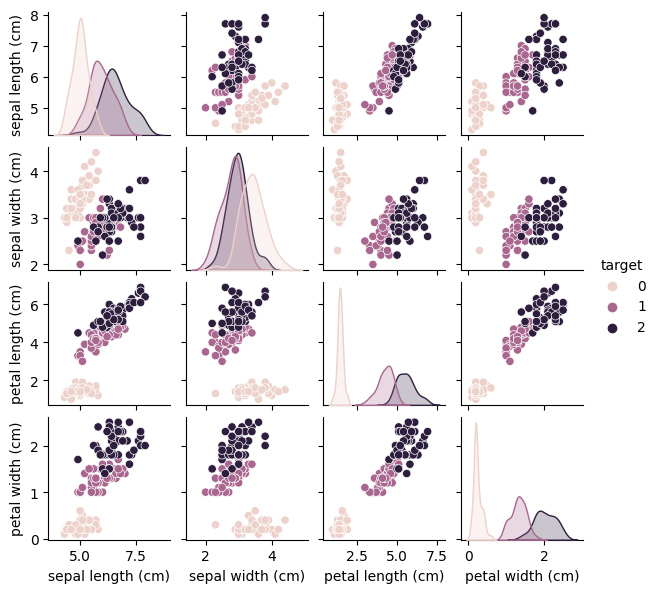

In [7]:
sns.pairplot(iris_df, hue='target', size=1.5);

In [8]:
print('targets: {}'.format(iris.target_names),iris.target_names[0], sep="\n")

targets: ['setosa' 'versicolor' 'virginica']
setosa


In [9]:
# simple train-test split
(iris_train_ftrs, iris_test_ftrs,
 iris_train_tgt,iris_test_tgt) = skms.train_test_split(iris.data,iris.target,test_size=.25)
print("Train features shape:", iris_train_ftrs.shape)
print("Test features shape:",
iris_test_ftrs.shape)

Train features shape: (112, 4)
Test features shape: (38, 4)


In [10]:
answer_key = np.array([True, True, False, True])
student_answers = np.array([True, True, True, True]) # desperate student!

In [11]:
answer_key = np.array([True, True, False, True, False, False])
student_answers = np.array([True, True, True, True, True, True]) # desperate student!

In [12]:
correct = answer_key == student_answers
num_correct = correct.sum() # True == 1, add them up
print("manual accuracy:", num_correct / len(answer_key))

manual accuracy: 0.5


In [13]:
print("sklearn accuracy:",metrics.accuracy_score(answer_key,student_answers))

sklearn accuracy: 0.5


In [14]:
# default n_neighbors = 5
knn= neighbors.KNeighborsClassifier(n_neighbors=3)
fit= knn.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)
# evaluate our predictions against the held-back testing targets
print("3NN accuracy:",
metrics.accuracy_score(iris_test_tgt, preds))

3NN accuracy: 1.0


NAIVE BAYES


In [16]:
nb= naive_bayes.GaussianNB()
fit= nb.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)
print("NB accuracy:", metrics.accuracy_score(iris_test_tgt, preds))

NB accuracy: 1.0
